In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


In [5]:
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [6]:
test.describe()

,age,balance,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


In [7]:
df.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [8]:
print(df.shape)
print(test.shape)

(39211, 16)
(10000, 15)


<Axes: >

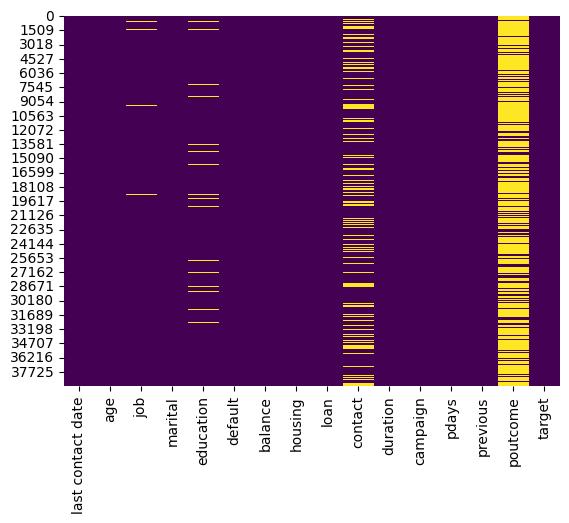

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'viridis' )

In [10]:
et = df.groupby(['education']).size().reset_index(name = 'count')
et

,education,count
0,primary,6545
1,secondary,19584
2,tertiary,11615


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


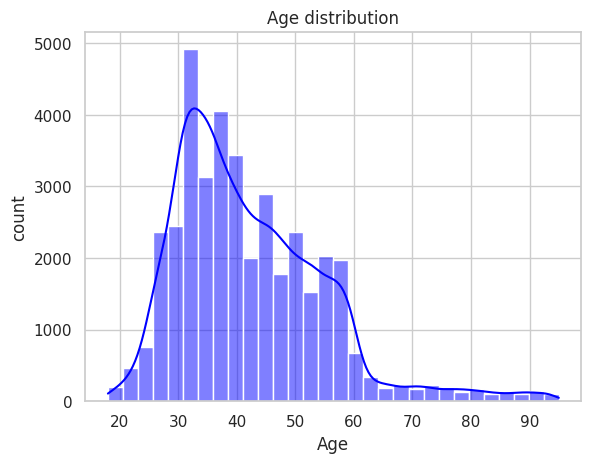

In [11]:
sns.set(style='whitegrid')
sns.histplot(df['age'], bins = 30, kde = True,  color = 'blue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

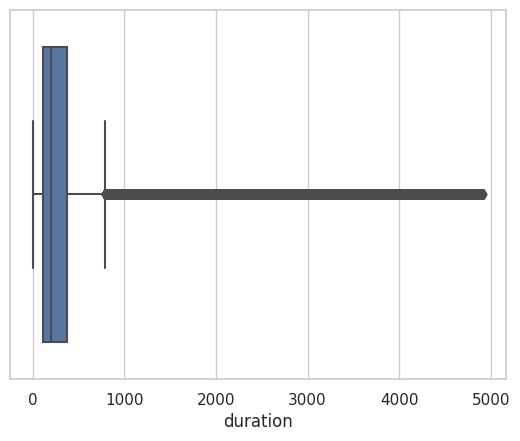

In [12]:
sns.boxplot(x = df['duration'])
plt.show()

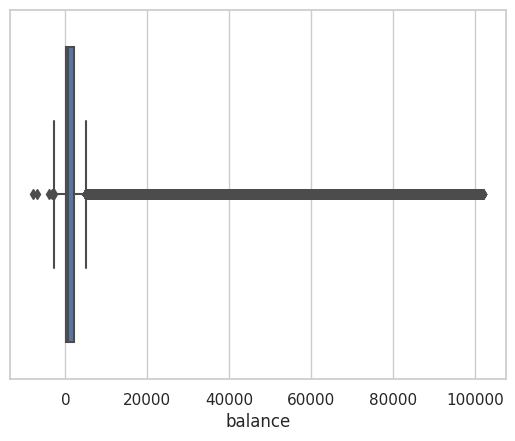

In [13]:
sns.boxplot(x = df['balance'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


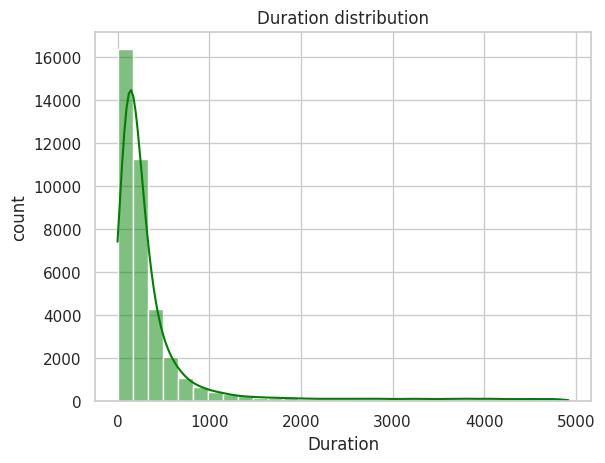

In [14]:
sns.histplot(df['duration'], bins=30, kde = True, color='green')
plt.title('Duration distribution')
plt.xlabel('Duration')
plt.ylabel('count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


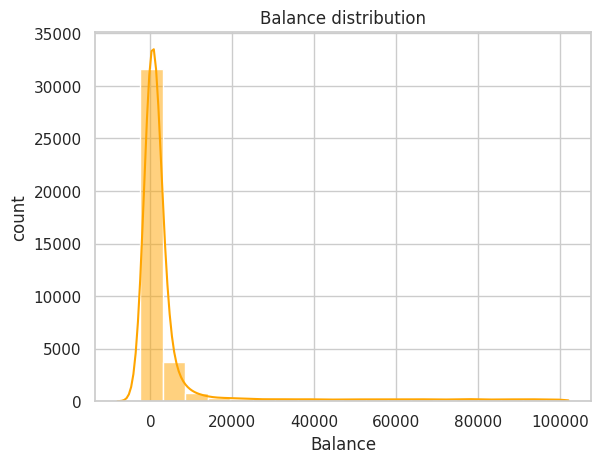

In [15]:
sns.histplot(df['balance'], bins=20, kde = True, color='orange')
plt.title('Balance distribution')
plt.xlabel('Balance')
plt.ylabel('count')
plt.show()

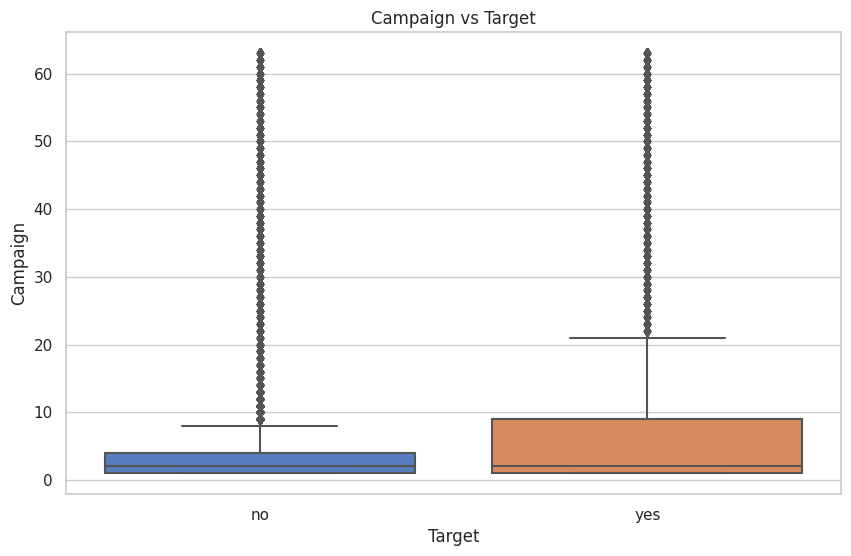

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='campaign', data=df, palette="muted")
plt.title('Campaign vs Target')
plt.xlabel('Target')
plt.ylabel('Campaign')
plt.show()


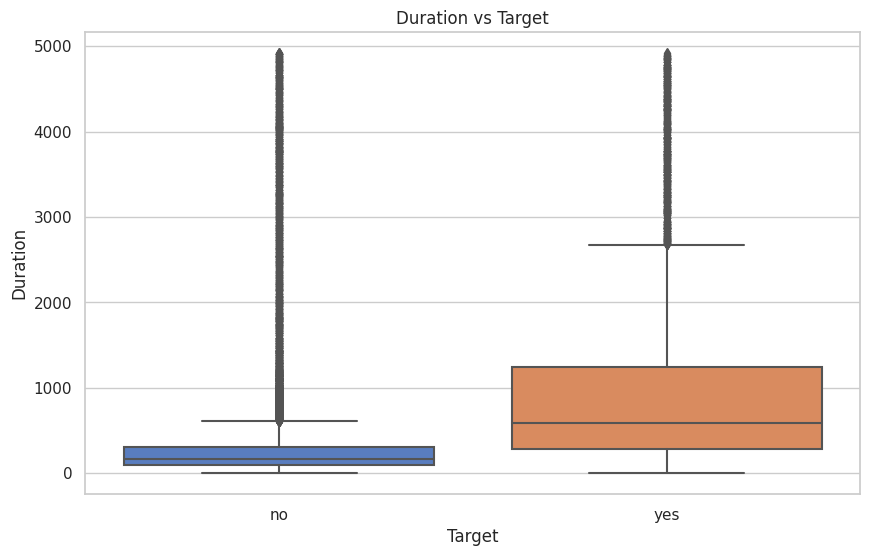

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='duration', data=df, palette="muted")
plt.title('Duration vs Target')
plt.xlabel('Target')
plt.ylabel('Duration')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


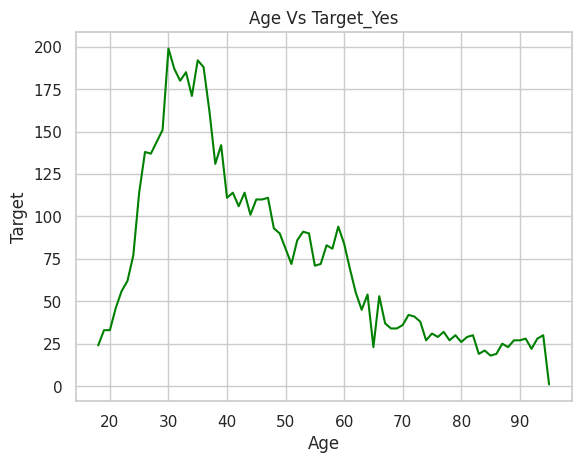

In [18]:
df_yes = df[(df['target'] == "yes")]
target_count = df_yes.groupby('age').size().reset_index(name= 'count')
sns.lineplot(x = 'age',y = 'count', data = target_count, color='green')
plt.title('Age Vs Target_Yes')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


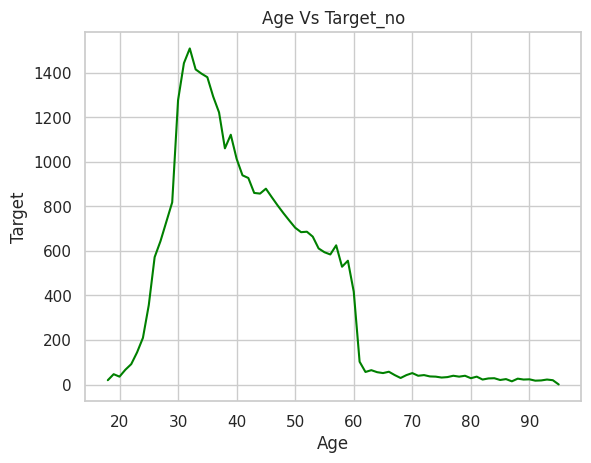

In [19]:
df_yes = df[(df['target'] == "no")]
target_count = df_yes.groupby('age').size().reset_index(name= 'count')
sns.lineplot(x = 'age',y = 'count', data = target_count, color='green')
plt.title('Age Vs Target_no')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

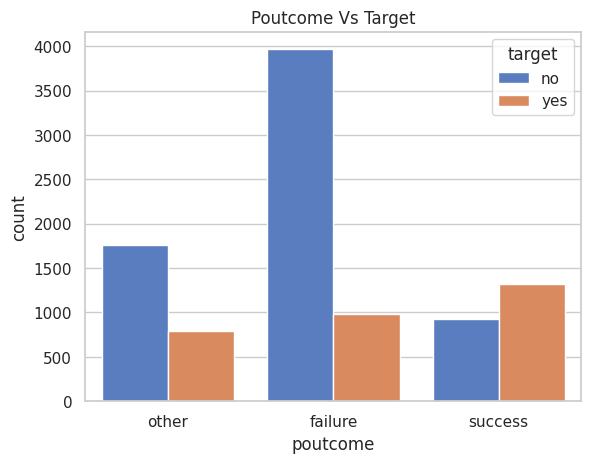

In [20]:
# df_yes = df[(df['poutcome'] == "yes")]
# target_count = df_yes.groupby('age').size().reset_index(name= 'count')
sns.countplot(x = 'poutcome',hue = 'target', data = df, palette='muted')
plt.title('Poutcome Vs Target')
plt.xlabel('poutcome')
plt.ylabel('count')
plt.show()

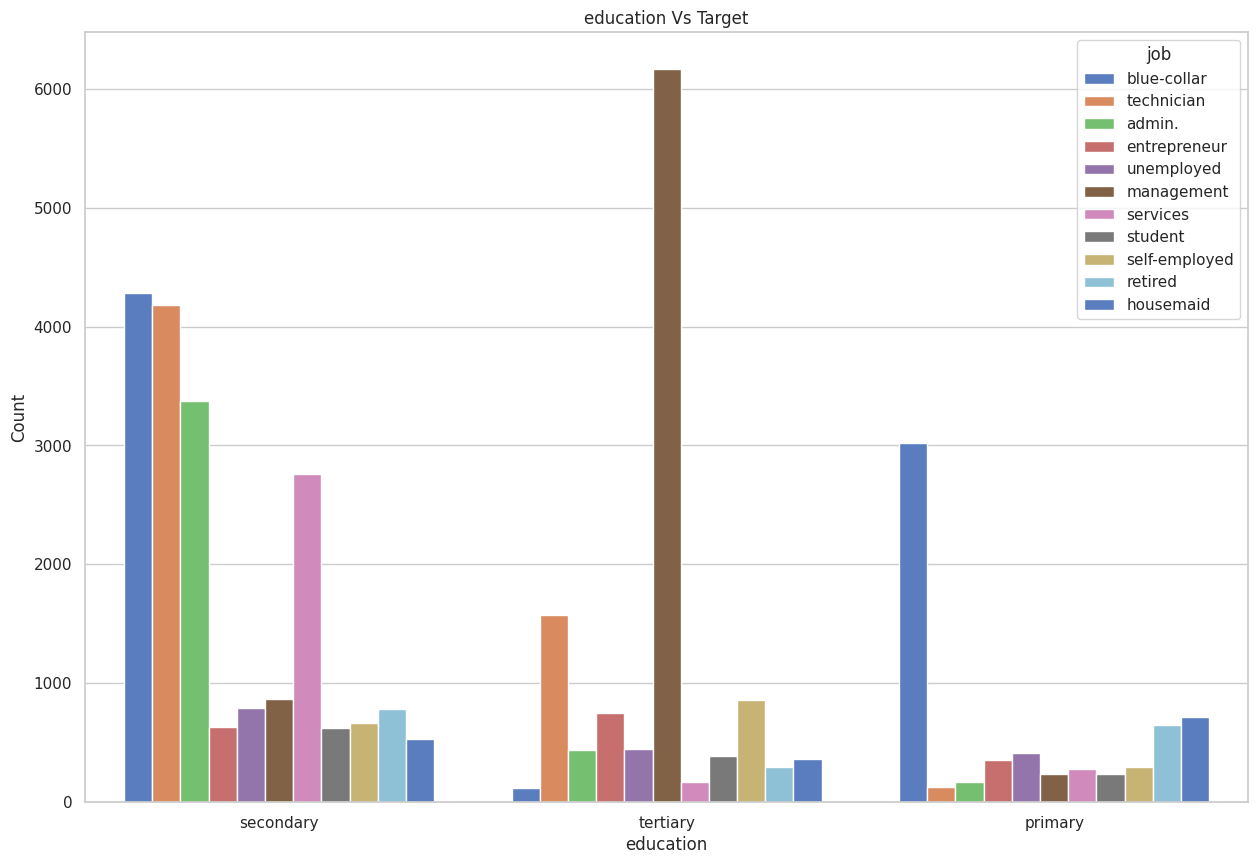

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'education', hue = "job", data = df, palette= 'muted')
plt.title('education Vs Target')
plt.xlabel('education')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='target', ylabel='duration'>

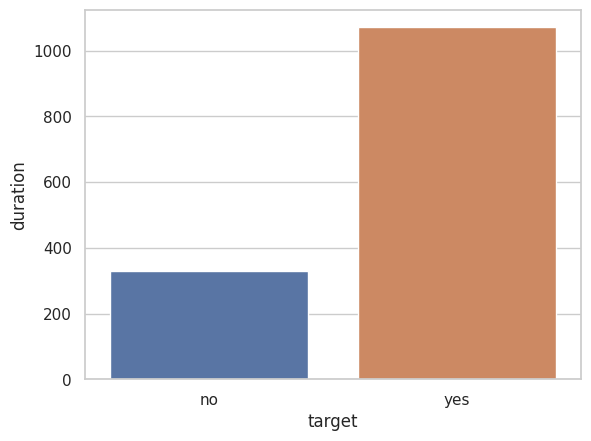

In [22]:
a = df.groupby('target')['duration'].mean().reset_index()
sns.barplot(x='target', y = 'duration', data = a)

In [23]:
balance_summary = df.groupby('target')['balance'].describe()
balance_summary

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
no,33384.0,3678.747963,12814.590824,-8019.0,74.0,473.0,1623.0,102127.0
yes,5827.0,15542.540072,27234.079387,-3058.0,354.0,1604.0,13014.0,101892.0


In [24]:
df["poutcome"] = df.poutcome.fillna("N/A")
df["contact"] = df.contact.fillna('N/A')

d = df.copy()
current_date = pd.Timestamp.now()
d['last contact date'] = pd.to_datetime(d['last contact date'])
d['last contact date'] = (current_date - d['last contact date']).dt.days

d.default = d.default.map({"yes":1, "no": 0})
d.housing = d.housing.map({"yes":1, "no": 0})
d.loan = d.loan.map({"yes":1, "no": 0})
d.target = d.target.map({"yes":1, "no": 0})

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d['education'] = label_encoder.fit_transform(d['education'])

d = pd.get_dummies(d, columns=['job','marital','contact', 'poutcome' ], prefix=['job','marital', 'contact', 'poutcome' ])

<function matplotlib.pyplot.show(close=None, block=None)>

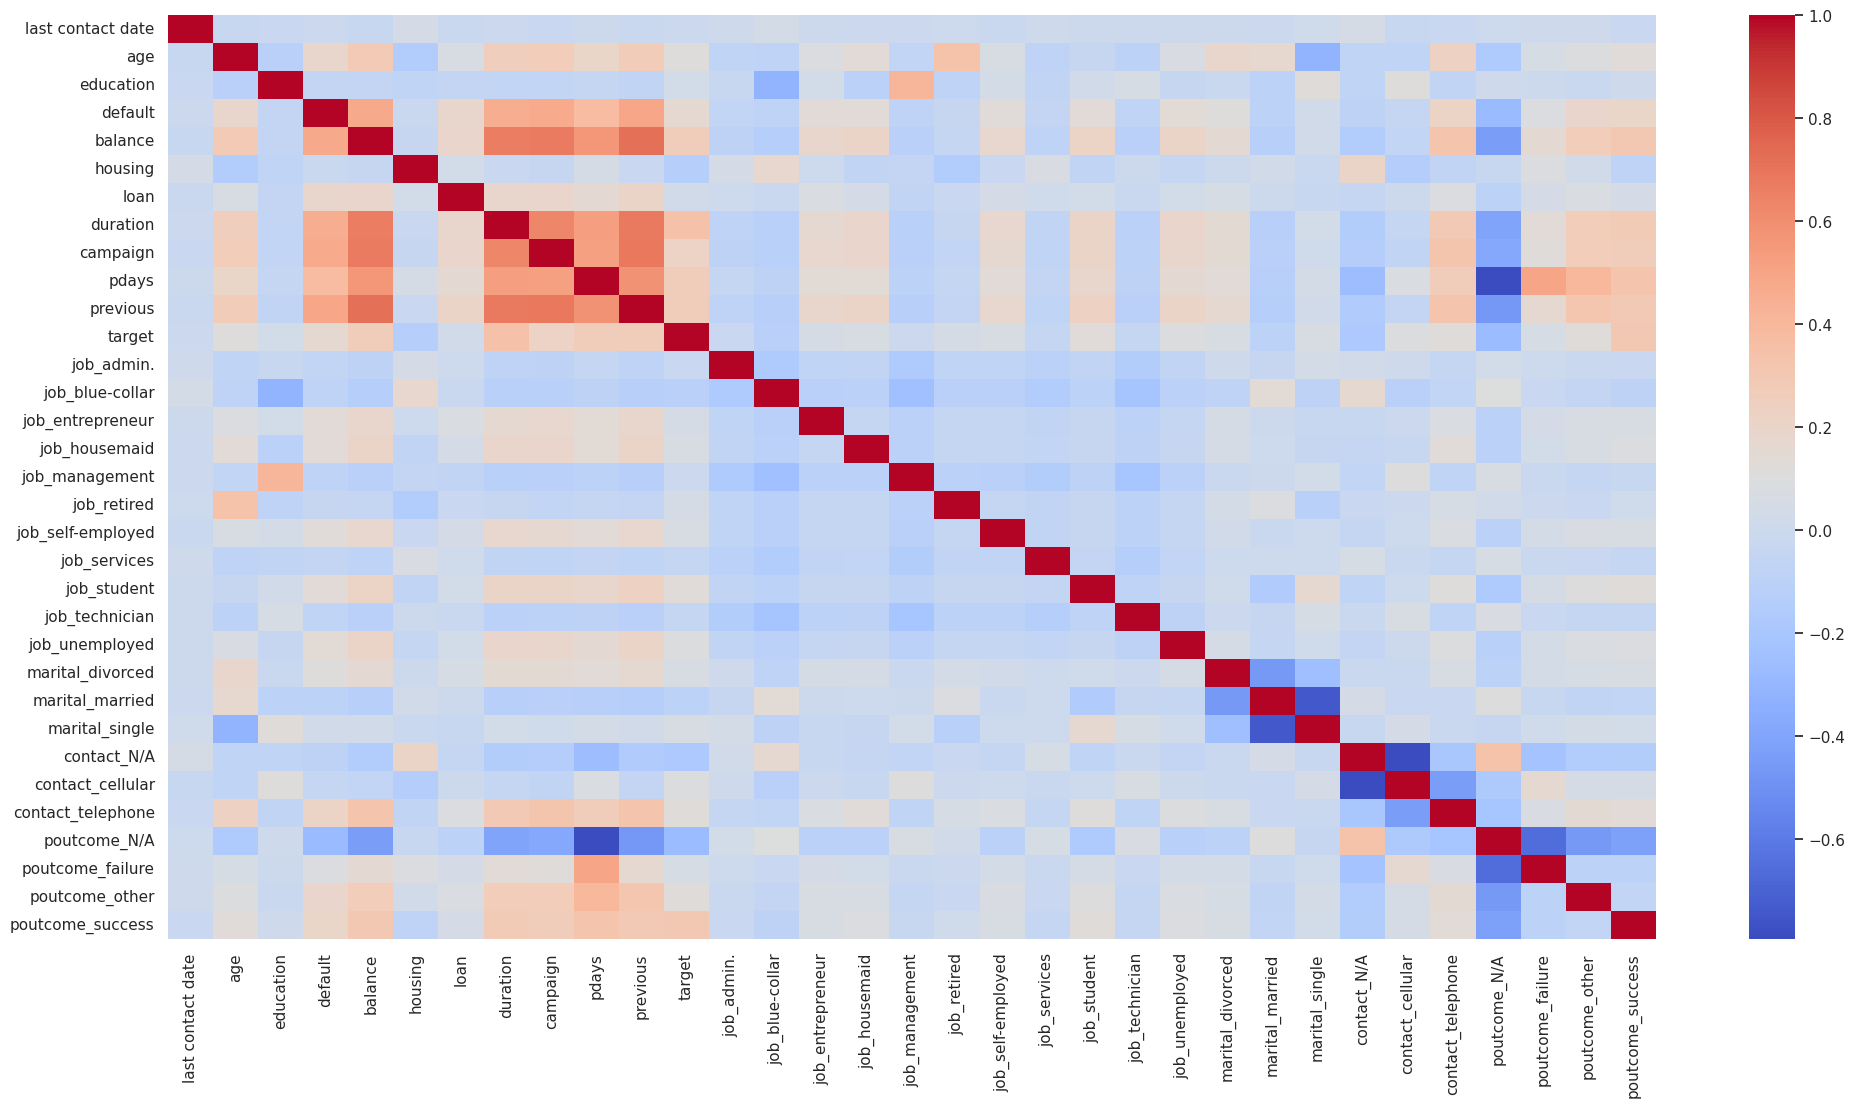

In [25]:
plt.figure(figsize=(24,12))
sns.heatmap(d.corr(), cmap = "coolwarm")
plt.show

In [26]:
correlation = d.corr()
correlation['target'].sort_values(ascending = False)

target               1.000000
duration             0.343325
poutcome_success     0.303748
previous             0.263123
pdays                0.258120
balance              0.257863
campaign             0.217205
default              0.159335
job_student          0.124333
contact_telephone    0.123102
poutcome_other       0.120323
age                  0.111939
contact_cellular     0.090784
job_unemployed       0.090367
job_housemaid        0.065919
job_self-employed    0.063141
marital_single       0.063116
marital_divorced     0.061558
poutcome_failure     0.053661
job_retired          0.049344
job_entrepreneur     0.047135
education            0.031646
loan                 0.021935
job_management      -0.010758
last contact date   -0.013385
job_admin.          -0.027523
job_technician      -0.046601
job_services        -0.049960
marital_married     -0.100341
job_blue-collar     -0.110689
housing             -0.129245
contact_N/A         -0.182099
poutcome_N/A        -0.273374
Name: targ

Preprocessing

In [27]:
#Loading train.csv
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

# Preprocessing

x = df.drop('target', axis=1)
y = df.target


current_date = pd.Timestamp.now()
x['last contact date'] = pd.to_datetime(x['last contact date'])
x['last contact date'] = (current_date - x['last contact date']).dt.days

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
x[['education', 'job']] = imputer.fit_transform(df[['education', 'job']])

imputer_na = SimpleImputer(strategy="constant",fill_value="N/A")
x[["poutcome", "contact"]] = imputer_na.fit_transform(df[['poutcome', 'contact']])

x["default"]= x["default"].map({'yes': 1, 'no': 0})
x["housing"]= x["housing"].map({'yes': 1, 'no': 0})
x["loan"]= x["loan"].map({'yes': 1, 'no': 0})

from sklearn.preprocessing import OrdinalEncoder

education_order = ['primary', 'secondary', 'tertiary']
encoder = OrdinalEncoder(categories=[education_order])

x['education'] = encoder.fit_transform(x[['education']])

x = pd.get_dummies(x, columns=['job', 'marital', 'contact', 'poutcome'], prefix=['job', 'marital', 'contact', 'poutcome'])

#Droping irrelavent Colmns
x = x.drop((['loan', 'job_entrepreneur', "job_retired", 'job_management', 'job_admin.', 'job_technician', 'job_services']), axis = 1)

In [28]:
x.isna().sum()

last contact date    0
age                  0
education            0
default              0
balance              0
housing              0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_housemaid        0
job_self-employed    0
job_student          0
job_unemployed       0
marital_divorced     0
marital_married      0
marital_single       0
contact_N/A          0
contact_cellular     0
contact_telephone    0
poutcome_N/A         0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
dtype: int64

In [29]:
y.value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

In [30]:
# Balancing Class
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state = 42)
x , y = oversampler.fit_resample(x,y)

# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.combine import SMOTEENN

# smotee_nn = SMOTEENN(random_state = 42)
# x , y = smotee_nn.fit_resample(x,y)

# Removing Outliers
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)

outliers = iso_forest.fit_predict(x)
# Filter out the outliers
x = x[outliers != -1]
y = y[outliers != -1]

print(df.shape)
 
print(x.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(39211, 16)
(66100, 25)


In [31]:
# Loading Test.csv
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Preprocessing of test.csv
current_date = pd.Timestamp.now()
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['last contact date'] = (current_date - test['last contact date']).dt.days

test[['education', 'job']] = imputer.transform(test[['education', 'job']])
test[["poutcome", "contact"]] = imputer_na.transform(test[['poutcome', 'contact']])

test["default"]= test["default"].map({'yes': 1, 'no': 0})
test["housing"]= test["housing"].map({'yes': 1, 'no': 0})
test["loan"]= test["loan"].map({'yes': 1, 'no': 0})

test['education'] = encoder.transform(test[['education']])

test_encoded = pd.get_dummies(test, columns=['job', 'marital','contact', 'poutcome' ], prefix=['job', 'marital', 'contact', 'poutcome' ])
test_encoded = test_encoded.drop((['loan', 'job_entrepreneur', "job_retired", 'job_management', 'job_admin.', 'job_technician', 'job_services']), axis = 1)

In [32]:
# Train-Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
y_train= y_train.map({'yes': 1, 'no': 0})
y_test= y_test.map({'yes': 1, 'no': 0})

Random Forest

XGBOOST

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score


xg = XGBClassifier(subsample = 0.7, n_estimators = 1000,
                   min_child_weight = 5, max_depth = 10,
                   learning_rate = 0.2, gamma = 1.5,
                   reg_lambda = 2, reg_alpha = 0,
                   colsample_bytree = 0.7, random_state = 42)

# Fitting Model

xg.fit(x_train, y_train)

# Prediction
y_pred_xg = xg.predict(x_test)


# evaluation
f1_xg = f1_score(y_test, y_pred_xg, average='macro')

print("f1_score: ", f1_xg)
print("Classification Report: \n", classification_report(y_test, y_pred_xg))

f1_score:  0.9273376082248226
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.92      6678
           1       0.89      0.98      0.93      6542

    accuracy                           0.93     13220
   macro avg       0.93      0.93      0.93     13220
weighted avg       0.93      0.93      0.93     13220



In [34]:
# Test Prediction
test_pred_xgb = xg.predict(test_encoded)
s2 = pd.DataFrame({"id" : range(0, test_pred_xgb.shape[0]), "target": test_pred_xgb})
s2['target'] = s2['target'].map({0:"no", 1: "yes"})

# Converting output into submission.csv

s2.to_csv("submission.csv", index = False)
print('done')

done


In [35]:
# # CV
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score

# cv_scores = cross_val_score(
#     estimator=xg,
#     X=x_train,
#     y=y_train,
#     cv=5,  # Number of folds
#     scoring=make_scorer(f1_score, average='macro') 
# )

# print("Cross-validation scores for each fold:", cv_scores)
# print("Mean CV score:", cv_scores.mean())

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xg)
print(cm) 

[[5861  817]
 [ 142 6400]]


Feature Selection

In [37]:
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# rfecv = RFECV(
#     estimator=xg,
#     step=1,  # Number of features to remove at each iteration
#     cv=StratifiedKFold(5),  # Use 5-fold cross-validation
#     scoring='f1_macro',  # Scoring metric
#     min_features_to_select=1  # Minimum number of features to keep
# )

# rfecv.fit(x_train, y_train)

# # Display results
# print(f"Optimal number of features: {rfecv.n_features_}")
# print(f"Selected features: {x_train.columns[rfecv.support_]}")

# # # Transform X to keep only selected features
# # x_selected = x.loc[:, rfecv.support_]
# # print(f"Shape of data after feature selection: {x_selected.shape}")


# all_features = x_train.columns

# # Selected features (features that were kept)
# selected_features = x_train.columns[rfecv.support_]

# # Features that were removed
# removed_features = [feature for feature in all_features if feature not in selected_features]

# print("Selected features:")
# print(selected_features)

# print("\nRemoved features:")
# print(removed_features)

Hyperparamter tuning

In [38]:
# from scipy.stats import randint
# param_grid = {
#     'n_estimators': randint(300, 1500),
#     'max_depth': randint(5, 20),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1],
#     'gamma': [0, 0.1, 0.5, 1, 1.5],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2],
#     'min_child_weight': randint(1, 7),
    
# }
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import f1_score



# xg = XGBClassifier()

# grid = RandomizedSearchCV(estimator = xg, param_distributions= param_grid,
#                           cv=[(slice(None), slice(None))], scoring='f1_macro', n_iter=1000,random_state=42,
#                           n_jobs=-1, verbose=2)


# grid.fit(x_train, y_train)
# print('Best Parameters: \n', grid.best_params_)
# best_estimator = grid.best_estimator_
# y_pred = best_estimator.predict(x_test)
# f1 = f1_score(y_test, y_pred, average = 'macro')
# print('F1-Score: ', f1)
# print("Classification Report: ", classification_report(y_test, y_pred))  


Logistic Regression

In [39]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report, f1_score


# logi_reg = LogisticRegression()

# #creating pipeline for scaling and model
# pipeline = Pipeline(steps=[
#     ('scaler', MinMaxScaler()),
#     ('logreg', logi_reg)
# ])

# # Fitting the model
# pipeline.fit(x_train, y_train)

# # Prediction
# y_pred_log = pipeline.predict(x_test)

# # Evaluation
# f1_logi = f1_score(y_test, y_pred_log, average='macro')

# print("f1_score: ", f1_logi)
# print("Classification Report: \n", classification_report(y_test, y_pred_log))

In [40]:
# # Prediction on test.csv
# test_pred_log = pipeline.predict(test_encoded)
# s5 = pd.DataFrame({"id" : range(0, test_pred_log.shape[0]), "target" : test_pred_log})
# s5['target'] = s5['target'].map({0:"no", 1: "yes"})

# # Converting output into submission.csv
# s5.to_csv("submission.csv", index = False)
# print("done")

Knn

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('knn', knn)])

# Fitting the model
knn_pipeline.fit(x_train, y_train)

# Prediction
y_pred_knn = knn_pipeline.predict(x_test)

# Evaluation
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("f1_score: ", f1_knn)
print("Classification Report: \n", classification_report(y_test, y_pred_knn))

f1_score:  0.8810219187588328
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      6678
           1       0.83      0.95      0.89      6542

    accuracy                           0.88     13220
   macro avg       0.89      0.88      0.88     13220
weighted avg       0.89      0.88      0.88     13220



In [42]:
# # Prediction on test.csv
# test_pred_knn = knn_pipeline.predict(test_encoded)
# s2 = pd.DataFrame({"id" : range(0, test_pred_knn.shape[0]), "target": test_pred_knn})
# s2['target'] = s2['target'].map({0:"no", 1: "yes"})

# # Converting output into submission.csv
# s2.to_csv("submission.csv", index = False)
# print('done')

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

rf = RandomForestClassifier(random_state=42, bootstrap=True, max_depth=None,max_features=None,min_samples_leaf=1,min_samples_split=2,n_estimators=300)

# fitting the model
rf.fit(x_train, y_train)

# prediction
y_pred_rf = rf.predict(x_test)

# evaluation
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("f1_score: ", f1_rf)
print("Classification Report: \n", classification_report(y_test, y_pred_rf))

f1_score:  0.9469607719943889
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94      6678
           1       0.90      1.00      0.95      6542

    accuracy                           0.95     13220
   macro avg       0.95      0.95      0.95     13220
weighted avg       0.95      0.95      0.95     13220



In [44]:
# # prediction on test.csv
# test_pred_rf = xg.predict(test_encoded)
# s2 = pd.DataFrame({"id" : range(0, test_pred_rf.shape[0]), "target": test_pred_rf})

# # Converting output into submission.csv
# s2.to_csv("submission.csv", index = False)
# print('done')

In [45]:
# from sklearn.ensemble import VotingClassifier

# voting_clf = VotingClassifier(
#     estimators=[('xg', xg), ('knn', knn_pipeline), ('log_reg', pipeline) , ('rf', rf)], 
#     voting='soft',
#     weights=[0.9273 , 0.8810 , 0.7771 , 0.9465]

# )
# # Fitting the Model
# voting_clf.fit(x_train, y_train)

# # Prediction
# y_pred_vote = voting_clf.predict(x_test)

# # evaluation
# f1_vote = f1_score(y_test, y_pred_vote, average='macro')

# print("f1_score: ", f1_vote)
# print("Classification Report: \n", classification_report(y_test, y_pred_vote))

In [46]:
# # Prediction on test.csv
# test_pred = voting_clf.predict(test_encoded)
# s2 = pd.DataFrame({"id" : range(0, test_pred.shape[0]), "target": test_pred})
# s2['target'] = s2['target'].map({0:"no", 1: "yes"})

# # Creating submission.csv
# s2.to_csv("submission.csv", index = False)
# print('done')